In [1]:
from openai import OpenAI
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFLoader
from langchain_openai import OpenAIEmbeddings
import numpy as np

from Utils.embedding import plot_results

load_dotenv()

client = OpenAI()
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002", chunk_size=1)
test_text_embeddings = [
    "Für was steht UNA?",
    "Für was steht UNH?",
    "Für was steht DTM?",
    "Für was steht RFF?",
    "Für was steht NAD?",
    "Für was steht LIN?",
    "Für was steht BGM?",
    "Was ist Bezeichnung für Trennzeichen?",
    "Was ist Bezeichnung für Gesetzlich vorgeschriebener Text?",
    "Was ist Bezeichnung für Nachrichtendatum?",
]


results = []
loader = PyPDFLoader(
    "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",
    extract_images=False,
)
pages = loader.load_and_split()
faiss_index = FAISS.from_documents(pages, embeddings)

<>:30: SyntaxWarning: invalid escape sequence '\M'
<>:30: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sebas\AppData\Local\Temp\ipykernel_22044\1647142458.py:30: SyntaxWarning: invalid escape sequence '\M'
  "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",


Erzeuge aus der liste "input_texts" embeddings.

In [2]:
np.array(faiss_index.similarity_search_with_score(test_text_embeddings[3], 1))

array([[Document(page_content="Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  \nSt = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  \n Seite:44 /96  \n \n Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  \n  \n 0270   SG3   D 1 2  Umsatzsteuernummer des Verkäufers  \n  \n 0280 27   RFF   M 1 2  Umsatzsteuernummer des Verkäufers  \n  \n Standard  Implementierung  \nBez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  \nRFF       RFF   \nC506  Referenz  M   M    \n1153  Referenz, Qualifier  M an..3   M an..3  +VA   VA  Umsatzsteuernummer  \n1154  Referenz, Identifikation  C an..70   R an..35 :DE12927 \n4000‘  Eindeutiger Identifier, der einem Geschäftspartner \nzum  Zwecke der umsatzsteuerlichen Behandlung \nvon der  Steuerbehörde zugewiesen wurde.  \nUmsatzsteuernummer des Verkäufers  \n1156  Zeilennummer  C an..6   N   Nicht benutzt  \n1056  Versionsnumm

Erstelle eine Matrix mit jedem Embedding, aber mit verändertem K-Parameter. So kannst du die Unterschiede besser analysieren.

In [3]:
results = np.zeros((10, 10))
results_embedding = []
for i in range(10):
    results[i, :] = np.array(
        faiss_index.similarity_search_with_score(test_text_embeddings[i], 10)
    )[:, 1]
    results_embedding.append(faiss_index.similarity_search(test_text_embeddings[i], 10))

print(results)

[[0.49716812 0.50099945 0.50744832 0.51441276 0.51774013 0.52189595
  0.52227068 0.52283013 0.52363455 0.52508175]
 [0.51827711 0.5223093  0.5282582  0.53120756 0.53395879 0.53565514
  0.5363692  0.53838426 0.53877032 0.53953099]
 [0.41428033 0.42084447 0.42276162 0.42442602 0.42921355 0.43237025
  0.433635   0.4346711  0.44522315 0.44806617]
 [0.47356433 0.47474772 0.47661099 0.48021302 0.48096544 0.48569712
  0.48626465 0.48633736 0.48751554 0.48790911]
 [0.44839579 0.48440969 0.48832852 0.48938209 0.50187677 0.50466746
  0.50476938 0.50498438 0.51007515 0.51076841]
 [0.49799556 0.50019461 0.5007993  0.50490427 0.50778228 0.51179945
  0.51349032 0.51382893 0.51441103 0.51450139]
 [0.49012986 0.49771544 0.50379121 0.50828683 0.51032221 0.51574618
  0.5251503  0.5261867  0.52741945 0.52768821]
 [0.4218553  0.42687011 0.43011796 0.43225127 0.43240219 0.43258464
  0.43298885 0.43402168 0.43449938 0.43463022]
 [0.40716544 0.41948095 0.42099595 0.42645285 0.4273729  0.4334226
  0.44145158 

Visualisierung der Scores zu den einzelnen Fragen.

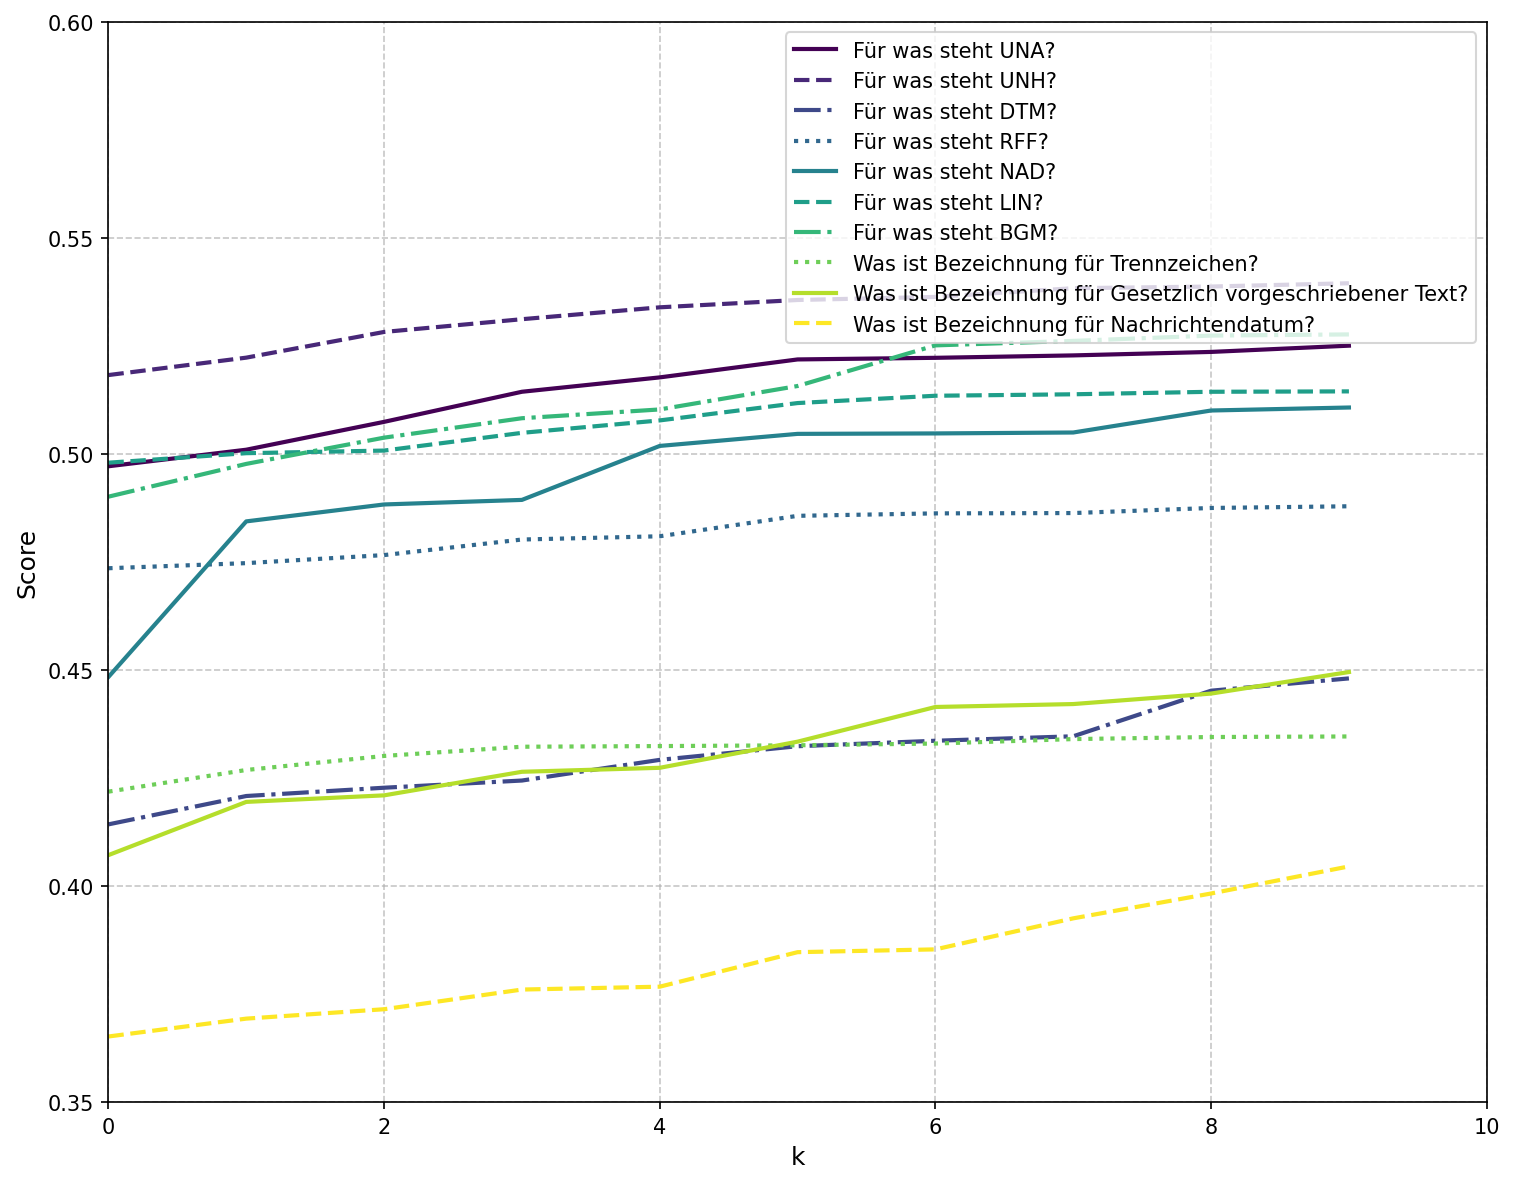

In [4]:
plot_results(results, test_text_embeddings,ylim=(0.35, 0.6),titel="Hyperparameter k des FAISS-Index auf zehn verschiedenen Fragen untersucht.")	

Im Folgenden werden die besten Ergebnisse für die Beantwortung aller Fragen präsentiert. Es ist jedoch zu konstatieren, dass lediglich teilweise die richtigen Antworten erkannt werden und Tabellen somit unbrauchbar interpretiert werden. Aus diesem Grund wird das Modell „text-embedding-ada-002” für diesen Teil nicht mehr berücksichtigt.

In [5]:
for i in range(10):
    print("-----------------------------------------")
    print(f"{i}."+ test_text_embeddings[i])
    print("-----------------------------------------")
    print(results_embedding[i][0].page_content)

-----------------------------------------
0.Für was steht UNA?
-----------------------------------------
Nachrichtenstruktur ............................... ................................................... ................................................... ............4 
Branchingdiagramm ................................. ................................................... ................................................... ..........8 
Segmentbeschreibung ............................... ................................................... ................................................... ...... 12
-----------------------------------------
1.Für was steht UNH?
-----------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
 Seite:14 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Na

Das Ergebnis der Abfrage kann auch unter "notebooks/text_output/embedding_ada.txt" nachgelesen werden.

Hier sind die einzelnen Einordnungen der Fragen:
1. "Für was steht UNA?":
    Unbrauchbare Antwort ohne Bezug zur UNA. Antwort für die Weiterverarbeitung ungeeignet. -> Falsch
2.  "Für was steht UNH?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
3.  "Für was steht DTM?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
4.  "Für was steht RFF?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
5.  "Für was steht NAD?":
    Antwort enthält NAD, aber keine weiteren nützlichen Informationen. Es handelt sich nur um ein Inhaltsverzeichnis, daher unbrauchbar. -> Falsch
6.  "Für was steht LIN?": 
    Geeignete Antwort für die Weiterverarbeitung -> Richtig
7.  "Für was steht BGM?":
    Unbrauchbare Antwort ohne Bezug zur BGM. Antwort für weitere Bearbeitung ungeeignet. -> Falsch
8.  "Was ist Bezeichnung für Trennzeichen?":
    Unbrauchbare Antwort ohne Bezug zur Frage. Antwort für weitere Bearbeitung ungeeignet. -> Falsch
9.  "Was ist Bezeichnung für Gesetzlich vorgeschriebener Text?":
    Gleiche Antwort wie bei Frage 1 und unbrauchbare Antwort ohne Bezug zur Frage. Die richtige Antwort wäre FTX. Für die weitere Bearbeitung ungeeignete Antwort. -> Falsch
10. "Was ist Bezeichnung für Nachrichtendatum?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig

